In [21]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate as tab
import warnings 
warnings.filterwarnings("ignore")
import matplotlib as mpl

In [2]:
df=pd.read_csv("data (1).csv")
df[:5]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# ---------------------------------------------------------------------------------------------------------------

##### plot the pair plot of salary, balance and age in data dataframe.  

>sns.pairplot(data = data, vars=['salary','balance','age'])
plt.show()

##### columnwise statistical description...
>df.column.describe()

# ---------------------------------------------------------------------------------------------------------------

In [ ]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

In [ ]:
#horizontal and percentage output....


# Let's calculate the percentage of each job status category.
df.col.value_counts(normalize=True)

#plot the bar graph of percentage job categories
df.col.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
#BARPLOT...


# analyzing the Education Field:

#plt.FIGURE['figure.figsize'] = (8, 4)
#PLT.figure(figsize=(8, 6), dpi=80)

plt.rcParams['figure.figsize'] = (8, 4)
data['EducationField'].value_counts().plot(kind = 'bar', color = 'orange')
plt.ylabel('Values')
plt.xlabel('Different Education Fields')
plt.xticks(rotation = 360)
plt.title('No. of Employees from different Education Fields', fontsize =12)
plt.show()

In [ ]:
# lets plot Education vs Monthly Rate

#plt.FIGURE['figure.figsize'] = (8, 4)
#PLT.figure(figsize=(8, 6), dpi=80)

plt.rcParams['figure.figsize'] = (10, 4)
plt.bar(data['EducationField'], data['MonthlyRate'], width = 0.7, align = 'center')
plt.title('Average Salary of Employees from Various Departments')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

### Histogram/column/bar with percentage:

In [ ]:
fig, ax = plt.subplots()

ax = sns.countplot(x = df["Marital_Status"])

for bar in ax.patches:
    
    percentage = f"{round(bar.get_height() /len(df), 2)}%" 
    
    x = bar.get_x() + bar.get_width() /2
    
    y = bar.get_height()   
    
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    ax.annotate(percentage, (x, y), va = "top", ha ="center" )
           
plt.show()

### Histogram/column/bar___&___Pie chart/diagram*(exploded/sliced) with percentage:

In [ ]:
#NIIT's Approach...

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
 
ax[0].set_title("Count of Card_Category:")
ax[1].set_title("Composition of Card_Category:")

percentage = df["Card_Category"].value_counts()

labels = list(df["Card_Category"].value_counts().index)

sns.countplot(x = df["Card_Category"], ax = ax[0])

plt.pie(percentage,labels = labels, explode=[0.2,0.2,0.2,0.4,0.6], autopct= "%0.2f%%") 
#explode parameter is used for slicing the pie chart...

plt.show()

# ---------------------------------------------------------------------------------------------------------------

In [ ]:
#1. Simple Bar


x = np.array(list("ABCDEFGHIJ"))  # categorical variable 
y = np.arange(1, 11)
sns.barplot(x=x, y=y, palette="viridis") 

In [ ]:
#2. Vertical barplot


tips = sns.load_dataset("tips") # load embedded dataset "tips"

sns.barplot(x="day", y="total_bill", data=tips, color="royalblue")

In [ ]:
#3. Horizontal Barplot


# make a horizontal barplot
sns.barplot(x="total_bill", y="day", data=tips, color="royalblue")

# add a vertical line
plt.axvline(x = 19.8,color='r',linewidth = 2,linestyle = '--')

# add annotation
plt.text(19.8+0.2, 0.5, " Avg Bill: $20", size='small', color='r', weight='light')

In [ ]:
#4. Grouped Barplot


sns.barplot(x="day", y="total_bill", hue="sex", data=tips, palette = "Set1")
plt.legend(loc=2)  # set legend position 

In [ ]:
#5. Facet Barplot


plt.figure(figsize = (12,6))
sns.catplot(x="sex", y="total_bill",
                hue="time", col="day",
                data=tips, kind="bar",
                height=5, aspect=.7,palette = "Set1");

# ---------------------------------------------------------------------------------------------------------------

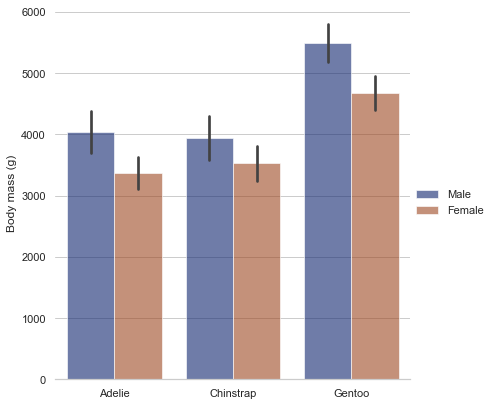

In [17]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# ---------------------------------------------------------------------------------------------------------------

##### Multivariate Plots  
There are two different types of plots available to visualize Multivariate data using bar Plots  
>* Grouped Bar Plots  
>* Stacked Bar Plots  

In [6]:
#Grouped Bar Plots
# lets plot Departments vs Monthly Rate

#plt.FIGURE['figure.figsize'] = (8, 4)
#PLT.figure(figsize=(8, 6), dpi=80)

plt.rcParams['figure.figsize'] = (10, 4)

x = data.pivot_table(index = ['Department','EducationField'],   #PLOTTING USING PIVOT TABLE
                     values = ['MonthlyRate'], 
                     aggfunc = 'mean')

x = pd.crosstab(index = data['Department'],
                columns = data['EducationField'],   #PLOTTING USING CROSSTAB(COUNTING...)
                values = data['MonthlyRate'],
                aggfunc = 'mean')

x.plot(kind = 'bar', stacked = False)
plt.xticks(rotation = 90)
plt.show()

##### We can Plot Multi-Variate Charts for any data using Pivot_table() function  

In [ ]:
# using crosstab funtion, making a cross tabular using multiple variables.
# we have used mean function to aggregate the values of Monthly rate.
# for x axis -> index: Department
# for y axis -> index: Education Field
# values (x X y) -> Monthly Rate, aggreated using mean function

x = pd.crosstab(index = data['Department'],
                columns = data['EducationField'],
                values = data['MonthlyRate'],
                aggfunc = 'mean')
x

##### Stacked Bar Plot

In [ ]:
# lets plot a Stacked Bar Chart
# we will use x, which we have created using crosstab function

# setting the size of the plot

#plt.FIGURE['figure.figsize'] = (8, 4)
#PLT.figure(figsize=(8, 6), dpi=80)

plt.rcParams['figure.figsize'] = (8, 4)

# keeping the Stacked option to **True**
x.plot(kind = 'bar', stacked = True)
plt.ylabel('Salary')
plt.xticks(rotation = 20)
plt.show()

##### Grouped Bar Plot

In [ ]:
# Lets make a Grouped Bar Plot 
# we will be using the variable x which we have created using the cross tab function

# setting the size of the plot

#plt.FIGURE['figure.figsize'] = (8, 4)
#PLT.figure(figsize=(8, 6), dpi=80)

plt.rcParams['figure.figsize'] = (8, 4)

# keeping the stacked option to **false**
x.plot(kind = 'bar', stacked = False)
plt.xticks(rotation = 20)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

>sns.histplot(auto.horsepower,bins=10)

# ---------------------------------------------------------------------------------------------------------------

# categorical info. def function

In [ ]:
def info_of_cat(col):
    
        # unique: returns the unique values in the col
        print(f"Unique values in {col} are: {df[col].unique()}")
        
        # mode: returns the mode of the column
        print(f"Mode of {col} is {df[col].mode()[0]}")
        
        # isnull().sum() counts the number of null in dataframe
        print(f"Number of missing values in {col} is {df[col].isnull().sum()}")
        
        #` check if null values are present
        if df[col].isnull().sum() > 0:
            
            print(f"\nThere are null values in the {col} column")

# numerical info. def function

In [ ]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

# boxplot & histogram def function

In [ ]:
def box_hist(col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))
    sns.histplot(x = df["Customer_Age"], ax =ax[1], color = "m")
    sns.boxplot(x = df["Customer_Age"], ax = ax[0], color = "g")
    plt.show()

# countplot def function

In [ ]:
def countplot(col):
    fig, ax = plt.subplots(figsize = (10, 7))
    sns.countplot(x = "Dependent_count", hue = "Attrition_Flag", data = df)
    plt.show()

# missing values filled with mode()...nominal data!

In [ ]:
def fill_miss_mode(col):
    mode = df[col].mode()[0] #[0] is index, without "[0]" we'll get boolean value...
    print(mode)
    df[col].fillna(mode, inplace = True, axis = 0)

# User defined function for extracting numerical category column info...

In [ ]:

def numerical_cat_info(col):
    
    print(f"The mean of the {col} is {df[col].mean()}")
    
    print(f"The median of the {col} is {df[col].median()}")
    
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    
    print(f"The standard deviation of the {col} is {df[col].std()}")
    
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

# User defined function for drawing a boxplot and a histogram...

In [ ]:
def box_hist(col):

    fig, ax = plt.subplots(1, 2, figsize= (20, 7))

    sns.histplot(x = df[col], ax =ax[1], color = "m") 

    sns.boxplot(x = df[col], ax = ax[0], color = "g") 

    plt.show()

# filling missing values as unknown...

In [ ]:
df["Column"].fillna("Unknown",inplace=True)

# filling mising values with mean in numerical data...

In [ ]:
mean=36.93015214384509
df["Age"].fillna(mean,
                axis=0,
                inplace=True)

# Histogram for categorical vs categorical data/column...

In [ ]:
def cat_cat_hist(col):
    fig, ax = plt.subplots(figsize = (10, 7))
    sns.countplot(x = (col), hue = "col", data = df)
    plt.show()

In [ ]:
df.groupby(['city'])['bathroom'].aggregate(lambda x: x.mean()).plot(kind='barh',color=['r','g','b','y','c']\
    ,xlabel='City', title='Average number of bathrooms of a house in each city', fontsize=12);

# ---------------------------------------------------------------------------------------------------------------

##### hist/pie       S_Ma'am's Approach:

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
 
ax[0].set_title("Count of Marital Status:")
ax[1].set_title("Composition of Marital Status:")

percentage = df["Marital_Status"].value_counts()

labels = list(df["Marital_Status"].value_counts().index)

sns.countplot(x = df["Marital_Status"], ax = ax[0])

plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

# ---------------------------------------------------------------------------------------------------------------

##### lets check the documentation of Bar Plots in Matplotlib...
>help(plt.bar)

# ---------------------------------------------------------------------------------------------------------------